# Regression Problem

In [62]:
# Required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
# load data
dataset = pd.read_csv('ds_salaries (for regression).csv')

In [43]:
# show dataset shape 
dataset.shape

(3755, 11)

In [44]:
# show 5 first rows in dataset 
dataset.head(5)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L,80000
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S,30000
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S,25500
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M,175000
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M,120000


# Pre-Processing 

In [45]:
# Check for NaN values
dataset.isna().sum() 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary                0
dtype: int64

In [46]:
'''
    Show dataset info 
    To know what you should do in Pre-Processing
'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_currency     3755 non-null   object
 5   salary_in_usd       3755 non-null   int64 
 6   employee_residence  3755 non-null   object
 7   remote_ratio        3755 non-null   int64 
 8   company_location    3755 non-null   object
 9   company_size        3755 non-null   object
 10  salary              3755 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [47]:
'''
    Wont to encod text into integer 
'''
# Encod Text into integer by LabelEncoder
for column in dataset.columns :
    if dataset[column].dtype == "object":
        dataset[column] = LabelEncoder().fit_transform(dataset[[column]])

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [48]:
# Show dataset after Encoding
dataset.head(5)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary
0,2023,3,2,84,7,85847,26,100,25,0,80000
1,2023,2,0,66,19,30000,75,100,70,2,30000
2,2023,2,0,66,19,25500,75,100,70,2,25500
3,2023,3,2,47,19,175000,11,100,12,1,175000
4,2023,3,2,47,19,120000,11,100,12,1,120000


In [49]:
# check if any outlire
for column in dataset.columns:
    # Calculate Q1, Q3, and IQR for the current column
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dataset[column] = np.where((dataset[column] < lower_bound) | (dataset[column] > upper_bound), dataset[column].median(), dataset[column])



In [50]:
# Normalize dataset
dataset = MinMaxScaler(feature_range=(0,1)).fit_transform(dataset)

In [51]:
# Split data into features and target
data_x = dataset[:, :-1]  # Selects all rows and all columns except the last one
data_y = dataset[:,-1] # diagnosis

In [52]:
print("Features Shape",data_x.shape)
print("Target Shape",data_y.shape)

Features Shape (3755, 10)
Target Shape (3755,)


In [53]:
# select featues  
data_x = SelectPercentile(score_func=f_classif,percentile=55).fit_transform(data_x,data_y)

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2 4 6 8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [54]:
print("Features Shape after select features",data_x.shape)

Features Shape after select features (3755, 5)


In [55]:
# split into train and test 
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.2,random_state=44,shuffle=True)

In [56]:
print("x_Treain Shape is :",x_train.shape)
print("x_Test Shape is :",x_test.shape)
print("y_Treain Shape is :",y_train.shape)
print("y_Test Shape is :",y_test.shape)

x_Treain Shape is : (3004, 5)
x_Test Shape is : (751, 5)
y_Treain Shape is : (3004,)
y_Test Shape is : (751,)


# Regression Model

### KNN Model

In [57]:
# KNN
knn = KNeighborsRegressor(n_neighbors=2,weights='uniform',algorithm='auto').fit(x_train,y_train)

In [58]:
y_pred = knn.predict(x_test)

In [59]:
print("Test Score :",knn.score(x_test,y_test))
print("Train Score :",knn.score(x_train,y_train))

Test Score : 0.8666841697104013
Train Score : 0.9251391538190936


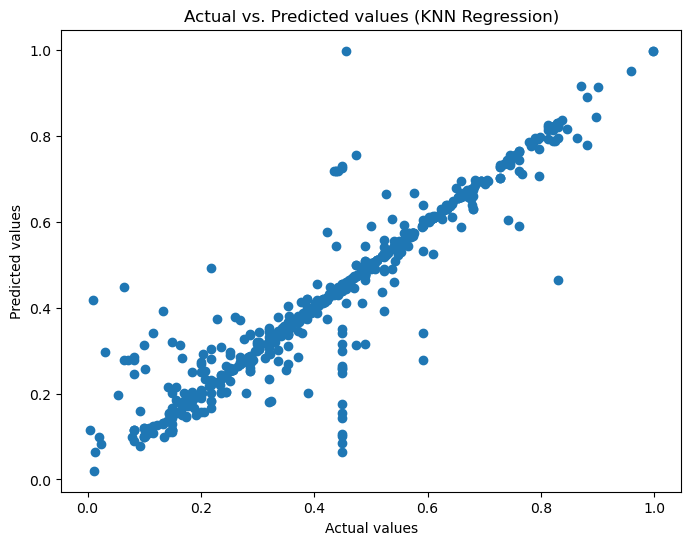

In [60]:
# Scatter plot for predicted vs. actual values insted of ROC curve
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values (KNN Regression)')
plt.show()

### RMSE & MAE

In [63]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.07013015730940254


In [64]:
# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.027364538891455386
